# **Key supply-demand factors that influence US home prices**


**Supply**

1.Construction Spending (Million $)

The amount spent (in millions of USD) is a

measure of the activity in the construction industry. Data Source: https://fred.stlouisfed.org/series/TTLCONS

2.Housing Starts (New Housing Project)

This is a measure of the number of units of new housing projects started in a given period. Data

Source: https://fred.stlouisfed.org/series/HOUST1F

3.Homes Sold

House for sale is a basic measure of supply. Data Source: https://fred.stlouisfed.org/series/ASPUS

**Demand**

1.Mortgage Rates(%)

Data Source: https://fred.stlouisfed.org/graph/?g=znew

2.USA GDP(Billions$)

Quarterly Real GDP (adjusted for Inflation) Data Source: https://fred.stlouisfed.org/series/GDPC1

3.Unemployment(%)

Data Source: https://fred.stlouisfed.org/series/UNRATE

4.Delinquency Rate on Mortgages

(Foreclosure on mortgage) an indicator of the number of foreclosures in real estate.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [4]:

home = pd.read_csv("/content/drive/MyDrive/housing_data/AUTHNOT1U.csv")
const = pd.read_csv("/content/drive/MyDrive/housing_data/TTLCONS.csv")

In [5]:
unemp = pd.read_csv('/content/drive/MyDrive/housing_data/unemployment.csv')
mortgage = pd.read_csv('/content/drive/MyDrive/housing_data/MORTGAGE.csv')
gdp = pd.read_csv("/content/drive/MyDrive/housing_data/GDP.csv")


In [6]:
case_shiller = pd.read_csv("/content/drive/MyDrive/housing_data/CSUSHPINSA.csv")

In [7]:
unemp.head(3)

,Unnamed: 0,DATE,UNEM_RATE
0,0,2000-01-01,4.03
1,1,2000-04-01,3.93
2,2,2000-07-01,4.00


In [8]:
mortgage.head(3)

,Unnamed: 0,DATE,MORTGAGE
0,0,2000-01-01,8.26
1,1,2000-04-01,8.32
2,2,2000-07-01,8.02


In [9]:
gdp.head(3)

,Unnamed: 0,DATE,GDPC1
0,0,2000-01-01,12935.252
1,1,2000-04-01,13170.749
2,2,2000-07-01,13183.890


In [10]:
case_shiller.head(5)

,DATE,CSUSHPINSA
0,1987-01-01,63.735
1,1987-02-01,64.134
2,1987-03-01,64.470
3,1987-04-01,64.974
4,1987-05-01,65.549


In [11]:
case_shiller = case_shiller[case_shiller["DATE"] >= "2000-01-01"]

In [12]:
case_shiller = case_shiller.rename(columns = {"CSUSHPINSA":"CS_index"})
case_shiller.reset_index(inplace = True)
case_shiller.drop("index", axis=1, inplace=True)

In [13]:
unemp.drop("Unnamed: 0", axis=1, inplace=True)


In [14]:
mortgage.drop("Unnamed: 0", axis=1, inplace=True)
gdp.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
const = const.rename(columns = {"TTLCONS":"construction"})
home = home.rename(columns = {"AUTHNOT1U":"housing_starts"})

In [16]:
data = pd.merge(unemp, mortgage, on ="DATE", how="left")

In [17]:
data1 = pd.merge(data, gdp, on ="DATE", how="left")

In [18]:
data2 = pd.merge(data1, const, on ="DATE", how="left")

In [19]:
data3 = pd.merge(data2, home, on ="DATE", how="left")

In [20]:
housing_df  = pd.merge(data3, case_shiller, on="DATE", how="left")

In [21]:
housing_df.head(5)

,DATE,UNEM_RATE,MORTGAGE,GDPC1,construction,housing_starts,CS_index
0,2000-01-01,4.03,8.26,12935.252,784940,78.9,100.000
1,2000-04-01,3.93,8.32,13170.749,804766,87.5,102.540
2,2000-07-01,4.00,8.02,13183.890,783795,86.1,105.721
3,2000-10-01,3.90,7.62,13262.250,816100,80.9,107.728
4,2001-01-01,4.23,7.01,13219.251,814479,82.9,109.214


In [22]:
housing_df.drop("DATE", axis=1, inplace=True)

In [23]:
housing_df.head(5)

,UNEM_RATE,MORTGAGE,GDPC1,construction,housing_starts,CS_index
0,4.03,8.26,12935.252,784940,78.9,100.000
1,3.93,8.32,13170.749,804766,87.5,102.540
2,4.00,8.02,13183.890,783795,86.1,105.721
3,3.90,7.62,13262.250,816100,80.9,107.728
4,4.23,7.01,13219.251,814479,82.9,109.214


# **Note:
this data is collected quartely( every 4 months)

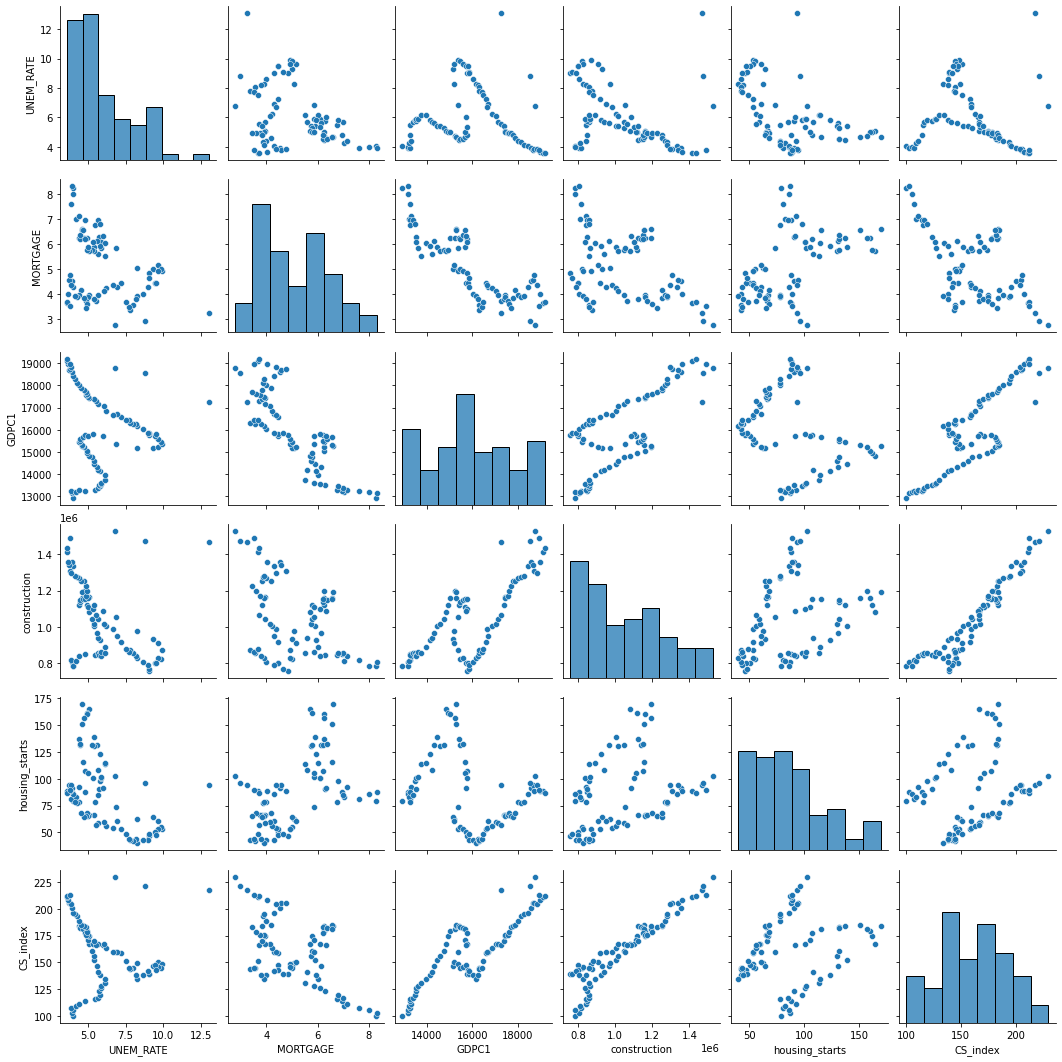

In [35]:
sns.pairplot(data=housing_df)

# **Learnings on the data:**

1.There is somewhat inverse correlation between the **Unemployment **rate and **Housing Prices**, as the unemployement rate increases the housing prices decreases.

2.The **Mortgage** also shows similar kind of behaviour, as the increase in mortgage there is a dip in **housing prices**.

3.The **GDP** shows that there is a kind of correlation between housing prices, it's somwewhat grows linearly and shows that if the GDP increases the **Housing prices** will also.

4.**Construction** also has a direct relation as the construction prices increases the **housing prices **will also.

5.there is somewhat relation between the **housing starts(empty houses)** as the **housing starts** increase there is decrease in prices but in some scenarios it also increases.

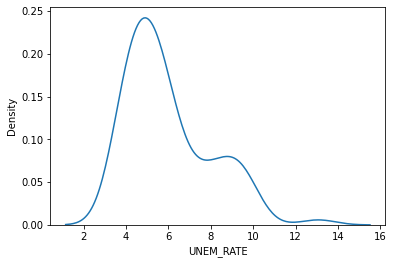

In [37]:
sns.kdeplot(housing_df["UNEM_RATE"])

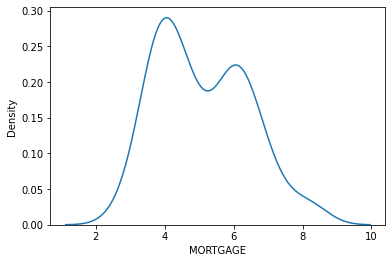

In [38]:
sns.kdeplot(housing_df["MORTGAGE"])

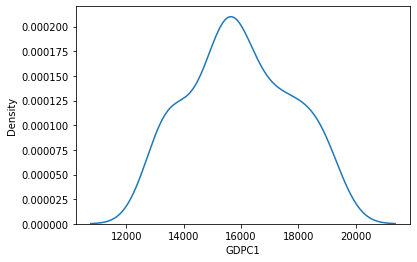

In [39]:
sns.kdeplot(housing_df["GDPC1"])

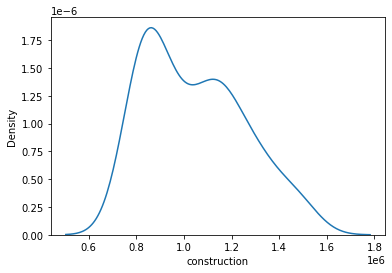

In [40]:
sns.kdeplot(housing_df["construction"])

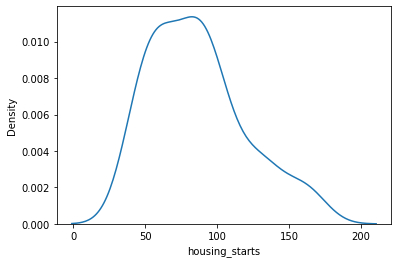

In [41]:
sns.kdeplot(housing_df["housing_starts"])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(housing_df.drop("CS_index", axis=1),
                                                    housing_df["CS_index"],
                                                    test_size =0.3,
                                                    random_state = 0)

**MinMaxScaler**

In [25]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [26]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [47]:
np.round(X_train.describe(), 1)

,UNEM_RATE,MORTGAGE,GDPC1,construction,housing_starts
count,58.0,58.0,58.0,58.0,58.0
mean,6.0,5.2,15792.1,1041359.9,87.9
std,2.0,1.4,1775.5,202996.9,33.1
min,3.6,3.0,12935.3,759964.0,42.6
25%,4.6,3.9,14494.8,859360.5,62.6
50%,5.4,5.1,15706.2,1015327.0,86.4
75%,6.7,6.2,17229.0,1169060.0,101.3
max,13.1,8.3,19202.3,1489988.0,169.7


In [48]:
np.round(X_train_scaled.describe(), 1)

,UNEM_RATE,MORTGAGE,GDPC1,construction,housing_starts
count,58.0,58.0,58.0,58.0,58.0
mean,0.2,0.4,0.5,0.4,0.4
std,0.2,0.3,0.3,0.3,0.3
min,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.2,0.2,0.1,0.2
50%,0.2,0.4,0.4,0.3,0.3
75%,0.3,0.6,0.7,0.6,0.5
max,1.0,1.0,1.0,1.0,1.0


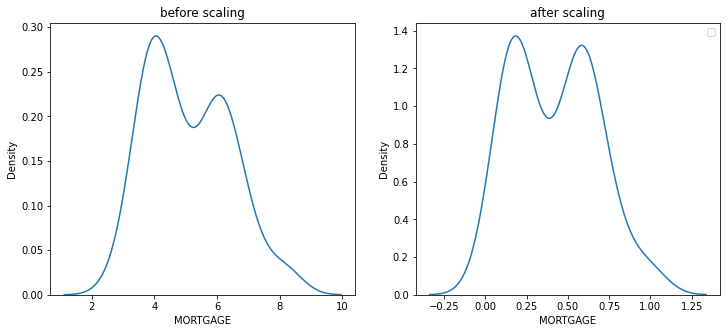

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("before scaling")
sns.kdeplot(housing_df['MORTGAGE'], ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled["MORTGAGE"], ax=ax2)
plt.legend()
plt.show()

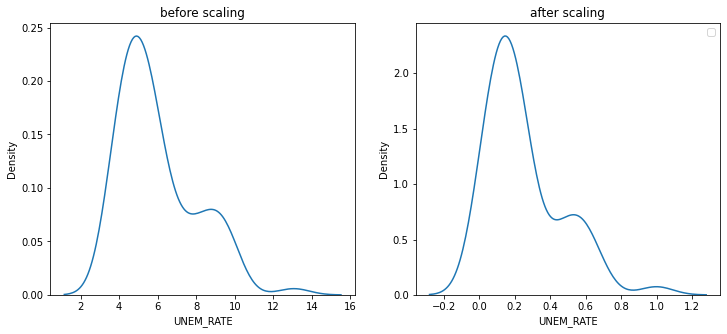

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("before scaling")
sns.kdeplot(housing_df['UNEM_RATE'], ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled["UNEM_RATE"], ax=ax2)
plt.legend()
plt.show()

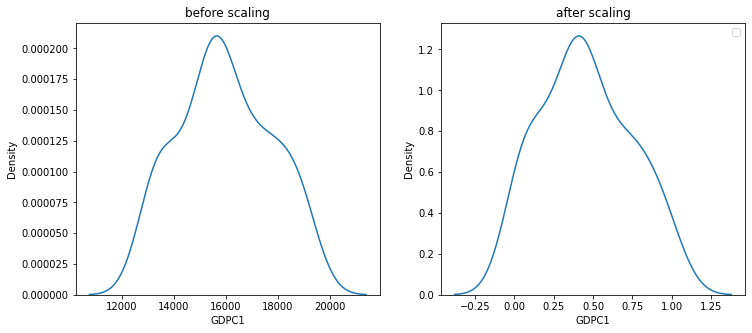

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("before scaling")
sns.kdeplot(housing_df['GDPC1'], ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled["GDPC1"], ax=ax2)
plt.legend()
plt.show()

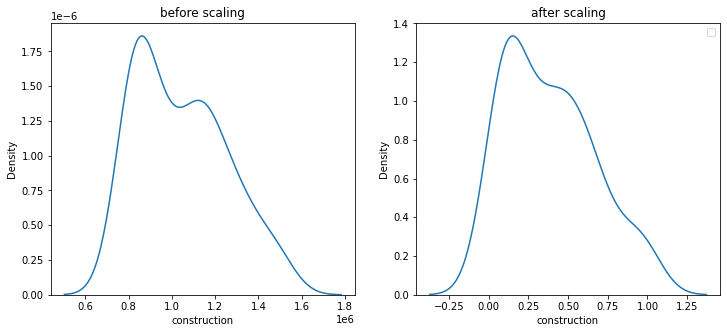

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("before scaling")
sns.kdeplot(housing_df['construction'], ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled["construction"], ax=ax2)
plt.legend()
plt.show()

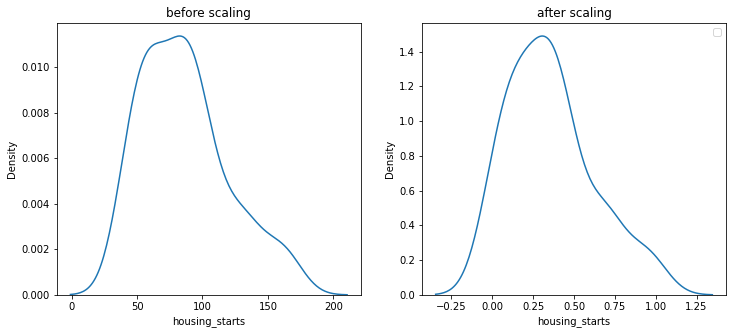

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("before scaling")
sns.kdeplot(housing_df['housing_starts'], ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled["housing_starts"], ax=ax2)
plt.legend()
plt.show()

In [28]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
model_params = {
          "XGB":
    { "model": XGBRegressor(),
        "params":{'learning_rate': [0.01],
        'max_depth': [5,10],
        'n_estimators' : [5000, 10000],
        'objective': ['reg:squarederror']                   
         }
    },
   "RFR":
    { "model": RandomForestRegressor(n_jobs=-1),
        "params":{ 
    'n_estimators': [10000, 20000, 40000],
    'max_depth' : [5,10]
    
    }                
  },
    "GBR":
    { "model": GradientBoostingRegressor(),
    "params":{ 
    'n_estimators': [25000, 30000, 40000],
    'max_depth' : [5, 10],
    'learning_rate' : [0.001],
    'random_state':[5],
    'loss': ['absolute_error', 'huber']
   }
    }
}   


In [30]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
  CV_rfc = GridSearchCV(mp["model"], param_grid=mp["params"], cv= 5)
  CV_rfc.fit(X_train_scaled, y_train)
  scores.append({
        'model': algo,
        'best_score': CV_rfc.best_score_,
        'best_params': CV_rfc.best_params_
    })
  
best_estimators[algo] = CV_rfc.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,XGB,0.928789,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est..."
1,RFR,0.931942,"{'max_depth': 10, 'n_estimators': 40000}"
2,GBR,0.924001,"{'learning_rate': 0.001, 'loss': 'absolute_err..."


In [33]:
best_estimators

{'GBR': GradientBoostingRegressor(learning_rate=0.001, loss='absolute_error',
                           max_depth=5, n_estimators=40000, random_state=5)}

In [34]:
Final_model = GradientBoostingRegressor(learning_rate=0.001, loss='absolute_error',
                           max_depth=5, n_estimators=40000, random_state=5)

In [35]:
Final_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.001, loss='absolute_error',
                          max_depth=5, n_estimators=40000, random_state=5)

In [36]:
target_predictions = Final_model.predict(X_test_scaled)

In [42]:
print("Mean Absolute Error : " + str(mean_absolute_error(target_predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(target_predictions, y_test)))
print("Root Mean Squared Error : " + str(math.sqrt(mean_squared_error(target_predictions, y_test))))

Mean Absolute Error : 3.4949291186640843
Mean Squared Error : 21.28084122320285
Root Mean Squared Error : 4.613116216095455


In [43]:
import pickle

In [44]:
with open('Housing_pkl', 'wb') as files:
    pickle.dump(Final_model, files)